<a href="https://colab.research.google.com/github/estatisticaufla/ARIMA/blob/master/AM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Introdução ao Aprendizado de Máquinas (AM)

# Análise exploratória de dados (AED)


In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [2]:
# resumo dos dados

print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [3]:
print(dataset.groupby('class').size()) # distribuição por classes

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


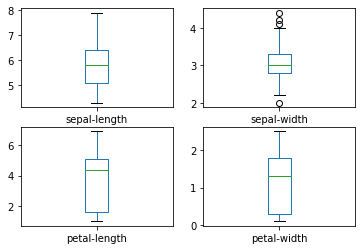

In [4]:
# Visualização dos dados

import matplotlib.pyplot as plt

dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show() # gráfico boxplot

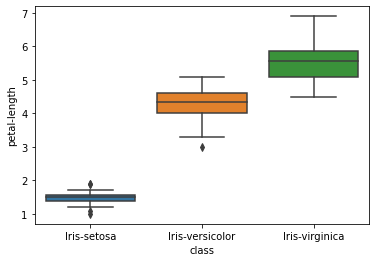

In [5]:
# ou da forma

import seaborn as sns

sns.boxplot(x="class", y="petal-length", data=dataset)

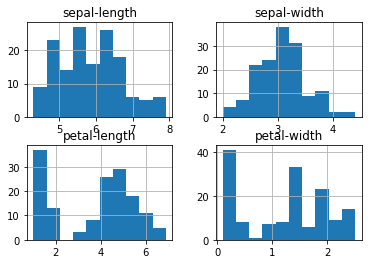

In [6]:
dataset.hist()
plt.show() # histograma

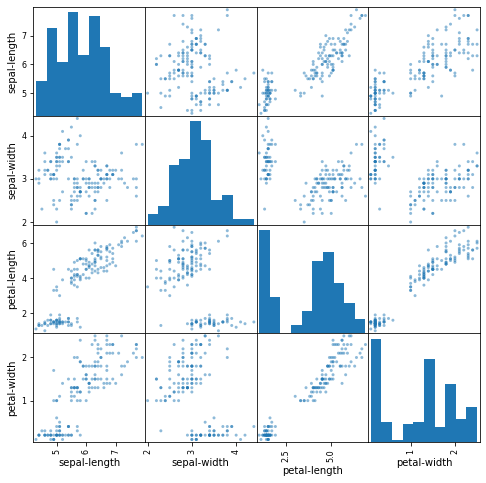

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize=(8,8))
plt.show()

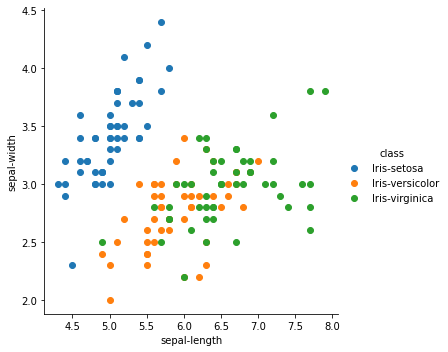

In [8]:
sns.FacetGrid(dataset, height=5,hue="class").map(plt.scatter,"sepal-length","sepal-width").add_legend()

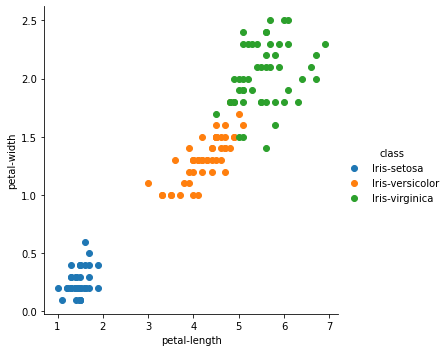

In [9]:
sns.FacetGrid(dataset, height=5,hue="class").map(plt.scatter,"petal-length","petal-width").add_legend()

In [11]:
# Conjunto de treinamento e de teste

from sklearn import model_selection

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 10
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # escalonamento (transformação nos dados)
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [ ]:
### k-NN

In [ ]:
# Treinamento e Previsões

from sklearn.neighbors import KNeighborsClassifier  

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Fazendo as previsões sobre os dados de teste

y_pred = knn.predict(x_test)
print(y_pred)

In [ ]:
# Avaliando o Algoritmo

from sklearn.metrics import classification_report, confusion_matrix 

print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))  

[[11  0  0]
 [ 0 14  1]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.98        38
   weighted avg       0.98      0.97      0.97        38



In [ ]:
# Somente a acurácia

from termcolor import colored as cl
from sklearn.metrics import accuracy_score

yhat = knn.predict(x_test)

print(cl('Prediction Accuracy Score (%) :', attrs = ['bold']), round(accuracy_score(y_test, yhat)*100, 2))

Prediction Accuracy Score (%) : 97.37


In [ ]:
# Valor de k

from sklearn import metrics

k_range = range(1, 30)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))


In [ ]:
# Gráfico de 'k'

import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Valores de k para k-NN')
plt.ylabel('Acurácia')

In [ ]:
# Gráfico de decisão - opcional

df = pd.DataFrame(dataset)
dicionario = {'Iris-setosa':0,
              'Iris-versicolor':1,
               'Iris-virginica':2}

df['class'] = df['class'].map(dicionario)

In [ ]:
colunas = ['sepal-length','sepal-width']
X1 = df[colunas]
X1 = X1.to_numpy()
Y = df['class']
Y = Y.to_numpy()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

n_neighbors = 5

h = 0.02  # step size in the mesh

# Cor dos mapas

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X1, Y)

    x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
    y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Resultado com a cor

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X1[:, 0], X1[:, 1], cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [ ]:
### Árvores de Decisão

from sklearn import model_selection

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.25
seed = 10
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

tree.plot_tree(clf)

In [ ]:
df = dataset
df1 = df[['sepal-length','sepal-width','petal-length','petal-width']]
df2 = df['class']

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=df1.columns,  
                      class_names=df2,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
# Fazendo as previsões sobre os dados de teste

y_pred1 = clf.predict(x_test)
print(y_pred1)

In [ ]:
# Avaliando o Algoritmo

from sklearn.metrics import classification_report, confusion_matrix 

print(confusion_matrix(y_test, y_pred1)) 
print(classification_report(y_test, y_pred1))

In [ ]:
from termcolor import colored as cl
from sklearn.metrics import accuracy_score

yhat1 = clf.predict(x_test)

print(cl('Prediction Accuracy Score (%) :', attrs = ['bold']), round(accuracy_score(y_test, yhat1)*100, 2))

In [ ]:
### Random Forest

from sklearn.ensemble import RandomForestClassifier

clf2=RandomForestClassifier(n_estimators=100)

clf2.fit(x_train,y_train)

y_pred2=clf2.predict(x_test)

In [ ]:
# Avaliando o Algoritmo

from sklearn.metrics import classification_report, confusion_matrix 

print(confusion_matrix(y_test, y_pred2)) 
print(classification_report(y_test, y_pred2))

In [ ]:
yhat2 = clf2.predict(x_test)

print(cl('Prediction Accuracy Score (%) :', attrs = ['bold']), round(accuracy_score(y_test, yhat2)*100, 2))

In [ ]:
# Ordem de importância das variáveis

df = dataset
df1 = df[['sepal-length','sepal-width','petal-length','petal-width']]

import pandas as pd
feature_imp = pd.Series(clf2.feature_importances_,index=df1.columns).sort_values(ascending=False)
feature_imp

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

In [ ]:
### Redes Neurais

# Outra forma de obter o conjunto de dados íris

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target.reshape(-1, 1) # Converte os dados em uma única coluna
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y) # encode
print(y)

In [ ]:
# Dados para treinamento e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Construção do modelo

from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=10,verbose=1)

In [ ]:
prediction=model.predict(x_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 84.21052631578947


In [ ]:
 # %pip install ann_visualizer # instalar o pacote 

from ann_visualizer.visualize import ann_viz;
from graphviz import Source

ann_viz(model,view = True, title="Minha primeira rede neural"); # visualização da rede neural
graph_source = Source.from_file('network.gv')
graph_source


In [ ]:
### Máquinas de Vetores de Suporte (SVM)

import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

print(dataset.head(20))

from sklearn import model_selection

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.25
seed = 10
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
from sklearn.svm import SVC
model=SVC() # modelo
model

In [ ]:
model.fit(x_train, y_train)
pred=model.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix # matriz de confusão
print(confusion_matrix(y_test,pred))

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
# Somente a acurácia

from termcolor import colored as cl
from sklearn.metrics import accuracy_score

yhat3 = model.predict(x_test)

print(cl('Prediction Accuracy Score (%) :', attrs = ['bold']), round(accuracy_score(y_test, yhat3)*100, 2))

In [ ]:
# Gráfico - opcional

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # vamos utilizar aqui somente duas variáveis
y = iris.target

h = 0.02 
C = 1.0 

svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Título dos gráficos 

titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    ###
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [ ]:
# Gráfico curva ROC

import numpy as np
import pylab as pl
from sklearn import svm, datasets
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

random_state = np.random.RandomState(0)

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Make it a binary classification problem by removing the third class
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features to make the problem harder
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X, y = shuffle(X, y, random_state=random_state)
half = int(n_samples / 2)
X_train, X_test = X[:half], X[half:]
y_train, y_test = y[:half], y[half:]

# Run classifier
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
# print 'Area under the ROC curve : %f' % roc_auc

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [ ]:
### Regressão

import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)

X = df['petal-width'] # variável independente 
y = df['petal-length'] # variável dependente

import numpy as np

X = np.array(X).reshape((len(X), 1)) # transformação para ficar uma única coluna
y = np.array(y).reshape(len(y),1)

import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

In [ ]:
# correlação

df['petal-length'].corr(df['petal-width'])

In [ ]:
# Matriz de correlações

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_corr = df.corr()
df_corr

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
sns.heatmap(df_corr, 
        xticklabels=df_corr.columns,
        yticklabels=df_corr.columns)

plt.title('Correlação')
plt.show()

In [ ]:
# Conjuntos de treino e teste

from sklearn import model_selection

validation_size = 0.25
seed = 10

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
# Modelo de regressão linear simples

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

In [ ]:
print('intercepto:', lr.intercept_) # intercepto

In [ ]:
print('inclinação:', lr.coef_) # inclinação

In [ ]:
r_sq = lr.score(x_train, y_train)
print('coeficiente de determinação:', r_sq) # R^2

coeficiente de determinação: 0.9276802662656223


In [ ]:
y_pred=lr.predict(x_test) # valores preditos
y_pred

In [ ]:
# Valores observados versus valores preditos

plt.plot(x_test, y_test, 'b.', label='observados')
plt.plot([x_test.min(), x_test.max()], [y_pred.min(), y_pred.max()],
         'r-', label='preditos')
plt.xlabel('Petal width')
plt.ylabel('Petal length')
plt.legend()
plt.show()

In [ ]:
# Performance do modelo

from sklearn.metrics import mean_squared_error

print('Mean Squared Error:', mean_squared_error(y_test, y_pred)) # MSE
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) # MRSE

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn.apionly as sns
import statsmodels.api as sm
 
# Modelando com statsmodels

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)

X = df['petal-width'] 
Y = df['petal-length']

model = sm.OLS(Y,X) # aqui estamos utilizando todos os dados
results = model.fit()
statsmodels_y_fitted = results.predict()
print(results.summary())

In [ ]:
import matplotlib.pyplot as plt
axes = df.plot(x='petal-width', y='petal-length', kind='scatter', color='yellow')
plt.plot(df['petal-width'], results.predict(), color='black', linewidth=3)
plt.show()

In [ ]:
# Clusters - K-means

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data[:, :4]  
y = iris.target # já codificadas

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('O método de Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # WCSS - within cluster sum of squares
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualizando os clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


In [ ]:
# Gráfico com os centróides

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [ ]:
# Gráfico 3D

from mpl_toolkits.mplot3d import Axes3D

km = KMeans(n_clusters=3)
km.fit(x)
km.predict(x)
labels = km.labels_
fig = plt.figure(1, figsize=(8,8))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=50, azim=134)
ax.scatter(x[:, 3], x[:, 0], x[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

In [ ]:
from sklearn import preprocessing

normalized_x = preprocessing.normalize(x)
normalized_x[:10] # mostra as 10 primeiras observações

kmeansn = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) # com dados normalizados
y_kmeansn = kmeans.fit_predict(normalized_x)

# Visualizando os clusters

plt.scatter(normalized_x[y_kmeans == 0, 0], normalized_x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(normalized_x[y_kmeans == 1, 0], normalized_x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(normalized_x[y_kmeans == 2, 0], normalized_x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


In [ ]:
# Gráfico 3D com dados normalizados

from mpl_toolkits.mplot3d import Axes3D

km = KMeans(n_clusters=3)
km.fit(normalized_x)
km.predict(normalized_x)
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(normalized_x[:, 3], normalized_x[:, 0], normalized_x[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

In [ ]:
# Dendograma

from scipy.cluster.hierarchy import linkage
linkage_type = 'ward'

linkage_matrix = linkage(normalized_x, linkage_type)

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(22,18))

# Gráfico do dendograma
dendrogram(linkage_matrix)

plt.show()

In [ ]:
# outro gráfico

import seaborn as sns

sns.clustermap(normalized_x, figsize=(12,18), method=linkage_type, cmap='viridis')
plt.show()